In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h2 style="color:#0000FF;">其實我們不一定要爬蟲</h2>

我們要注意<b style="color:red;">我們想做的事</b>,不要迷失在爬蟲技巧中!

# Google 翻譯
## 可以用一個套件，叫做
    googletrans

In [2]:
!pip install googletrans

In [3]:
from googletrans import Translator

In [4]:
pipi = Translator()

In [5]:
result = pipi.translate("This is a book.",dest="zh-tw")

In [6]:
print(result.text)

這是一本書。


In [7]:
result = pipi.translate("ドラえもん",dest="zh-tw")

In [8]:
print(result.text)

哆啦A夢


### 基本指令

* src:原文
* dest:目標語言

### 常用語言:

* 中文:zh-tw
* 日文:ja
* 英文:en
* 韓文:ko

In [9]:
!pip install pandas_datareader

In [10]:
import pandas_datareader.data as web

In [11]:
df = web.DataReader("AAPL","yahoo")

In [12]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-11,113.800003,111.339996,112.260002,111.620003,41401700.0,102.558395
2014-12-12,111.870003,109.580002,110.459999,109.730003,56028100.0,100.821831
2014-12-15,111.599998,106.349998,110.699997,108.230003,67218100.0,99.443619
2014-12-16,110.160004,106.260002,106.370003,106.750000,60790700.0,98.083740
2014-12-17,109.839996,106.820000,107.120003,109.410004,53411800.0,100.527809


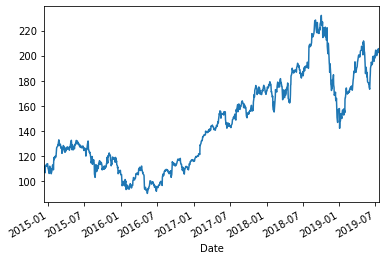

In [13]:
df[:-100].Close.plot()

## MLB 資料
    !pip install pybaseball

## requests+BeautifulSoup

In [14]:
import requests
from bs4 import BeautifulSoup

In [15]:
url = "https://www.marieclaire.com.tw/love-sex/astrology"

In [16]:
resp = requests.get(url)

<!DOCTYPE html>
<html lang="zh-Hant">
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=0"/>
<title>星座運勢 | LOVE & SEX | Marie Claire 美麗佳人</title>
<meta name="title" content="星座運勢 | LOVE & SEX | Marie Claire 美麗佳人"/>
<meta name="keywords" content="星座,運勢,愛情,事業,本月,本週,年度,安格斯,財運"/>
<meta name="news_keywords" itemprop="keywords" content="星座,運勢,愛情,事業,本月,本週,年度,安格斯,財運"/>
<meta name="description" content="關於每月,每周,每年運勢和12星座的小秘密"/>
<link rel="preconnect" href="https://stats.g.doubleclick.net">
<link rel="preconnect" href="https://www.google.com.tw">
<link rel="preconnect" href="https://www.google.com">
<link rel="preconnect" href="https://www.google-analytics.com">
<link rel="preconnect" href="https://fonts.gstatic.com">
<link rel="preconnect" href="https://tpc.googlesyndication.com">
<link rel="preconnect" href="https://pixel.adsafep
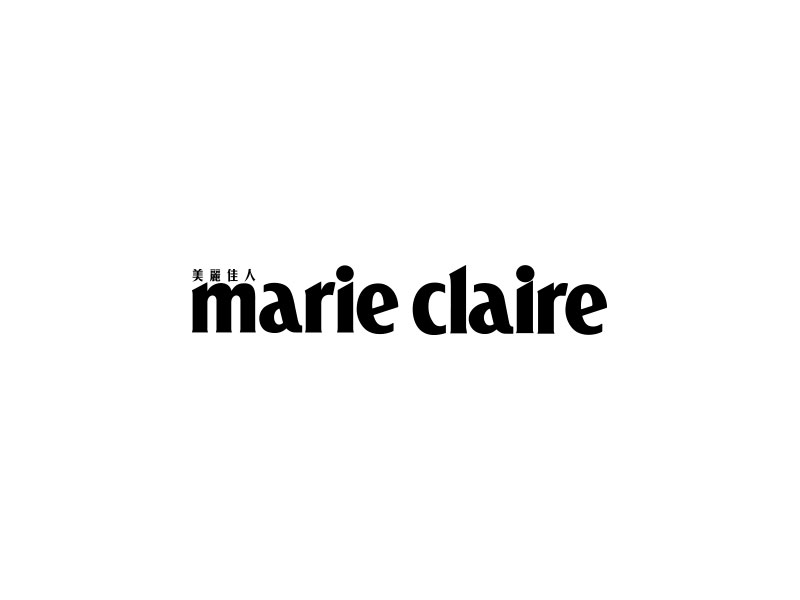
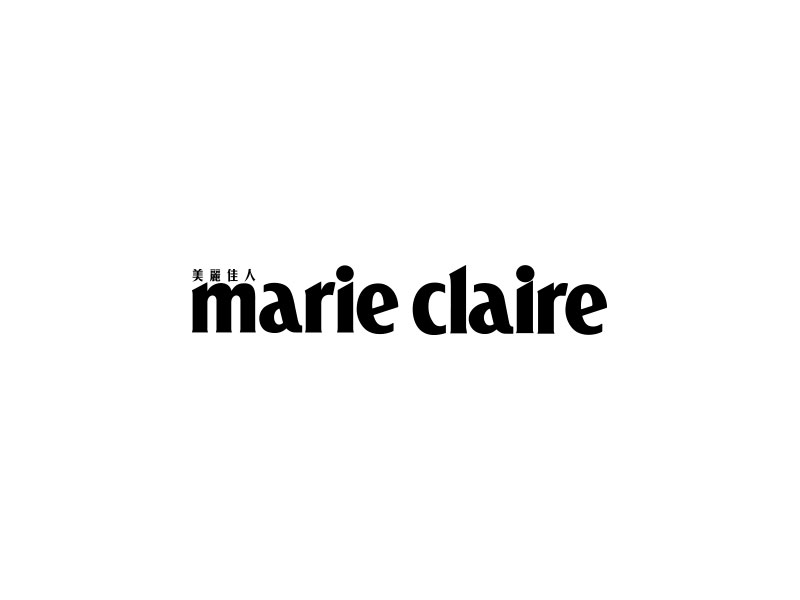
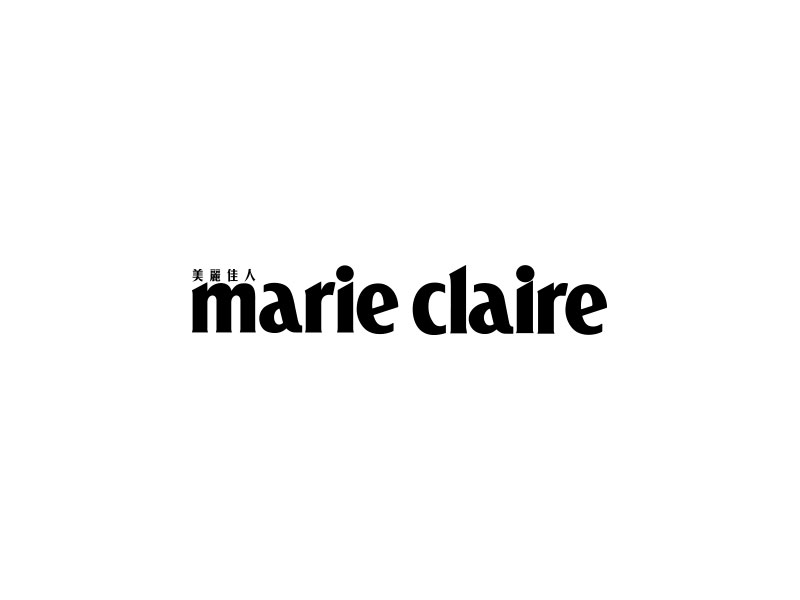
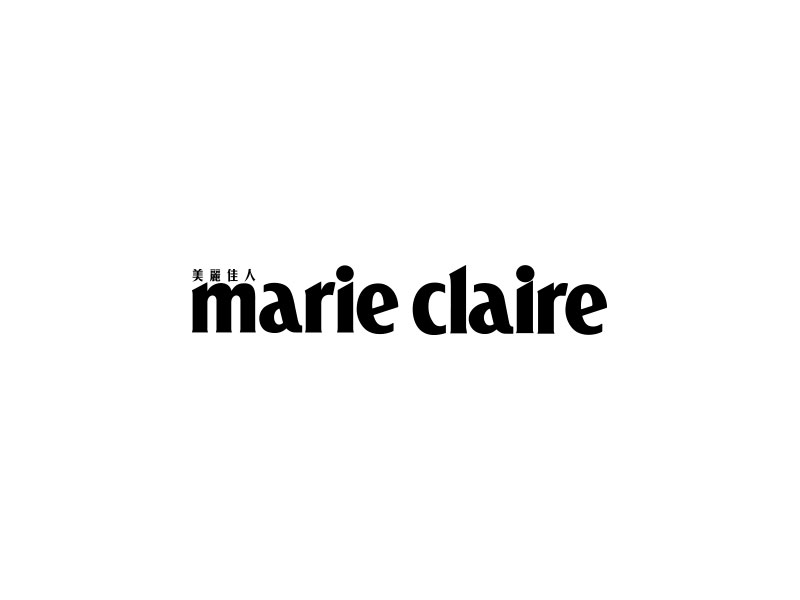
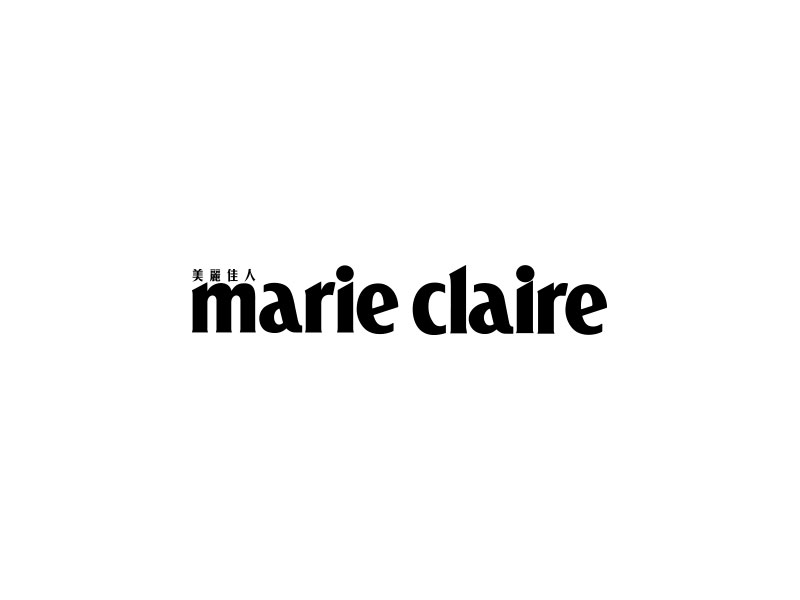
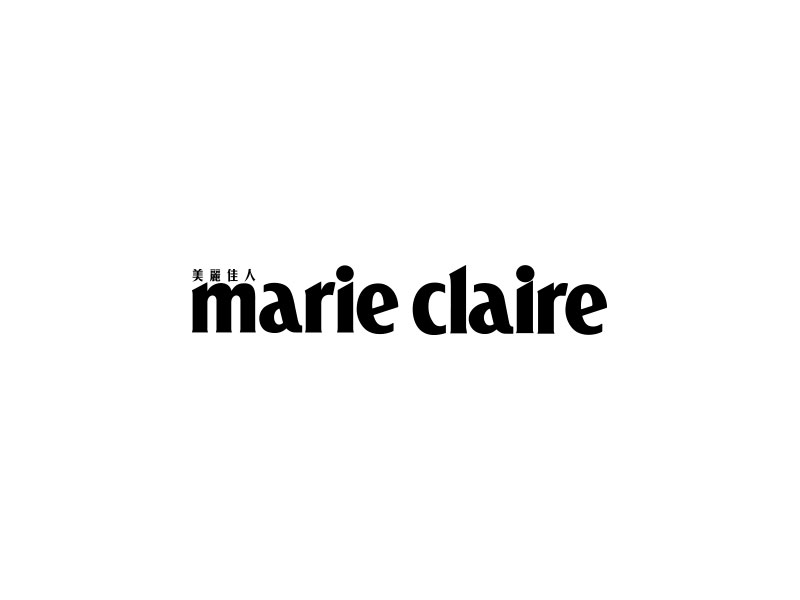
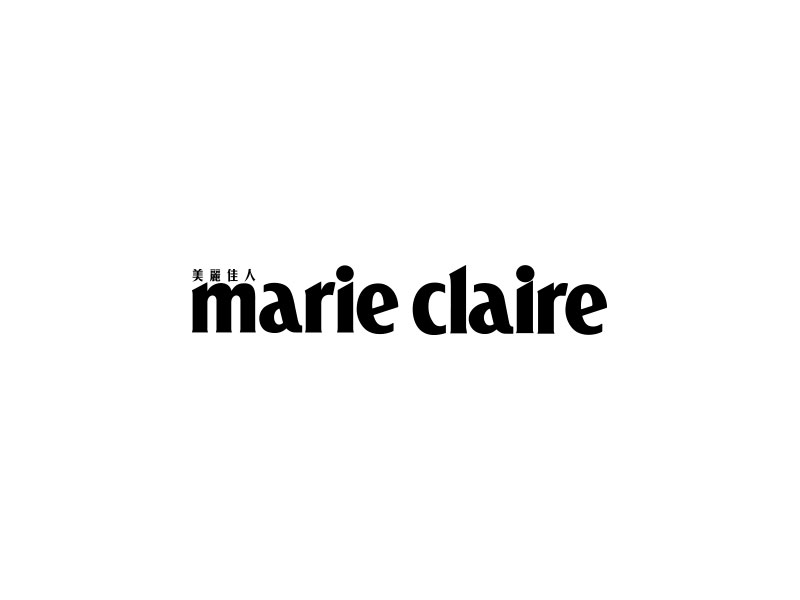
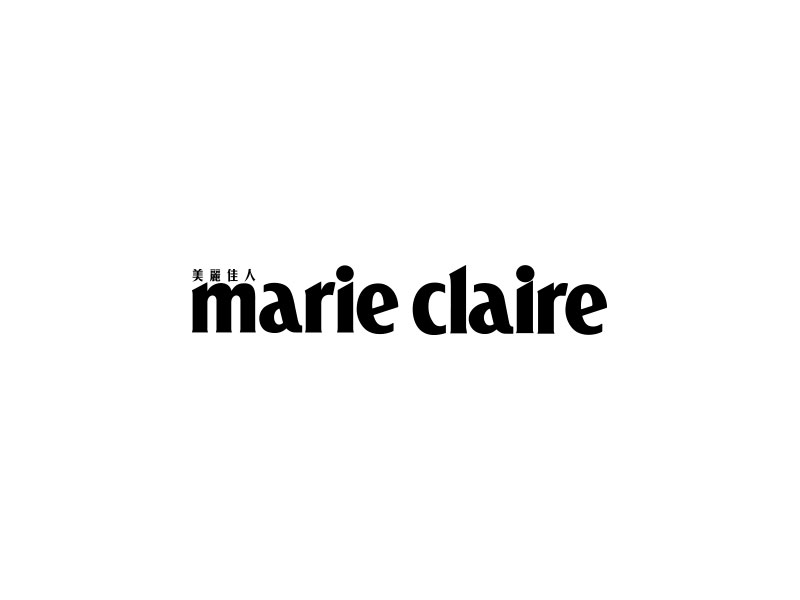

In [17]:
print(resp.text)

In [18]:
soup = BeautifulSoup(resp.text,'lxml')

In [19]:
hot = soup.find_all('div',class_='hot')

In [20]:
articles = hot[0].find_all('a')

[<a class="hotBox" href="https://www.marieclaire.com.tw/love-sex/astrology/46548">
 <img alt="《美麗佳人》2020年12星座運勢大預言！愛情運、工作運、健康運一次大揭密！（上）" data-src="https://im.marieclaire.com.tw/s800c533h100b0/assets/mc/201912/5DE8B91D6F0F81575532829.jpeg" id="lazy_images" src=""/>
 <h4>LOVE &amp; SEX 星座運勢</h4>
 <h3>《美麗佳人》2020年12星座運勢大預言！愛情運、工作運、健康運一次大揭密！（上）</h3>
 </a>,
 <a class="hotBox" href="https://www.marieclaire.com.tw/love-sex/astrology/46551">
 <img alt="《美麗佳人》2020年12星座運勢大預言！愛情運、工作運、健康運一次大揭密！（下）" data-src="https://im.marieclaire.com.tw/s800c533h100b0/assets/mc/201912/5DE8CA5A526311575537242.jpeg" id="lazy_images" src=""/>
 <h4>LOVE &amp; SEX 星座運勢</h4>
 <h3>《美麗佳人》2020年12星座運勢大預言！愛情運、工作運、健康運一次大揭密！（下）</h3>
 </a>,
 <a class="hotBox" href="https://www.marieclaire.com.tw/love-sex/astrology/46319">
 <img alt="【星星教授安格斯2019/11/25-12/1星座運勢】獅子桃花運強、摩羯受長官提拔、雙魚婚期近了" data-src="https://im.marieclaire.com.tw/s800c533h100b0/assets/mc/201911/5DDA49EDEC1541574586861.jpeg" id="lazy_images" src=""/>
 <h4>LOVE &amp; SEX
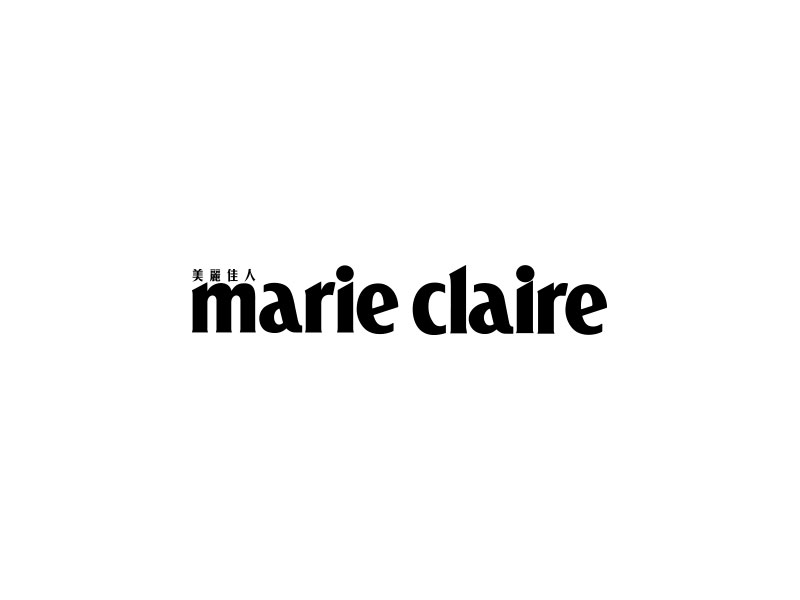
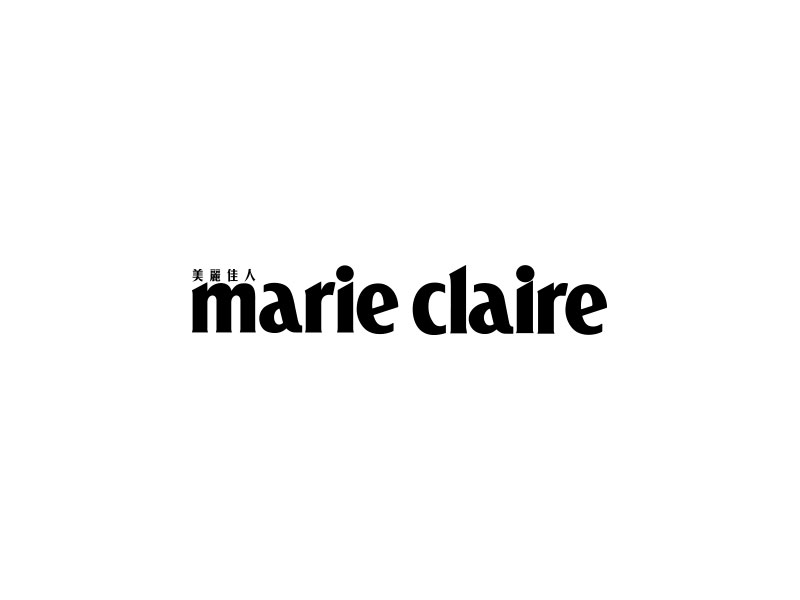
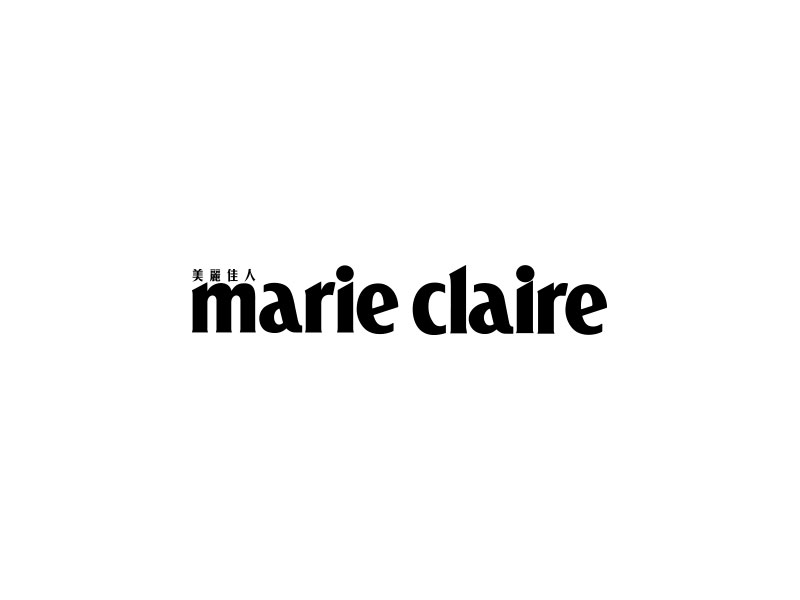
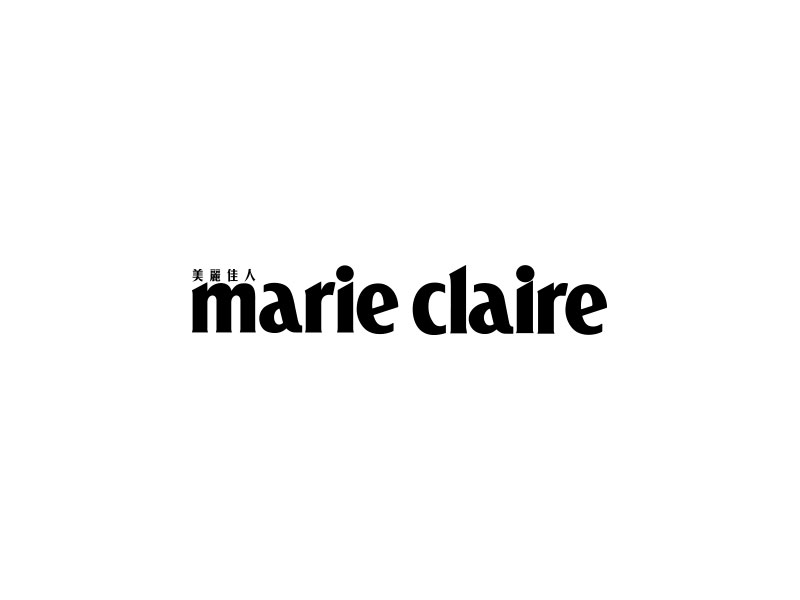

In [21]:
articles

In [22]:
len(articles)

4

In [23]:
item = articles[2]

In [24]:
item.attrs

{'href': 'https://www.marieclaire.com.tw/love-sex/astrology/46319',
 'class': ['hotBox']}

In [25]:
item['href']

'https://www.marieclaire.com.tw/love-sex/astrology/46319'

In [26]:
title = item.find('h3')

In [27]:
title

<h3>【星星教授安格斯2019/11/25-12/1星座運勢】獅子桃花運強、摩羯受長官提拔、雙魚婚期近了</h3>

In [28]:
title.contents[0]

'【星星教授安格斯2019/11/25-12/1星座運勢】獅子桃花運強、摩羯受長官提拔、雙魚婚期近了'

In [29]:
#下載安裝
!pip install selenium

[https://chromedriver.chromium.org/](https://chromedriver.chromium.org/)